In [2]:
import pandas as pd
import seaborn as sns


In [68]:
results = pd.read_csv('results.csv')

In [55]:
results["model"].unique()

array(['Random Forest', 'Gradient Boosting', 'Logistic Regression',
       'TabPFN', 'TabPFNne', 'default35970_260', 'trees13368_60',
       'trees456_390', 'trees66554_75', 'mlp60400_160', 'mlp71353_400',
       'trees13368_60_no_prepro', 'trees456_390_no_prepro',
       'trees13368_60_no_prepro2', 'trees456_390_no_prepro2',
       'TabPFNno_prepro', 'default35702_250_no_prepro2',
       'trees79428_250_no_prepro2', 'default35702_250', 'trees79428_250',
       'trees13368_15'], dtype=object)

In [7]:
results = pd.read_csv('tabpfn/results_benchmark.csv')
results = results[results["metric"] == "accuracy"]
results["accuracy"] = results["value"]
results = results[results["suite_id"] == "cc18"]
# results_large["suite_id"] = "337"
# results_large["model"] = results_large["model"] + "_large"
# # replce model "checkpoint" by trees
# results = pd.concat([results, results_large])
# results = results[results["suite_id"] == "337"]

In [19]:
results

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,suite_id,task_id,seed,metric,value,model,accuracy
1248,1248,0.0,NaN,NaN,NaN,NaN,337_large,361055,0,accuracy,0.779612,trees456_390,0.779612
1250,1250,0.0,NaN,NaN,NaN,NaN,337_large,361055,1,accuracy,0.766451,trees456_390,0.766451
1252,1252,0.0,NaN,NaN,NaN,NaN,337_large,361055,2,accuracy,0.772912,trees456_390,0.772912
1254,1254,0.0,NaN,NaN,NaN,NaN,337_large,361060,0,accuracy,0.800915,trees456_390,0.800915
1256,1256,0.0,NaN,NaN,NaN,NaN,337_large,361060,1,accuracy,0.799771,trees456_390,0.799771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,0,NaN,NaN,NaN,NaN,NaN,337_large,361277,1,accuracy,0.870905,tabpfn,0.870905
1420,0,NaN,NaN,NaN,NaN,NaN,337_large,361277,2,accuracy,0.867028,tabpfn,0.867028
1422,0,NaN,NaN,NaN,NaN,NaN,337_large,361278,0,accuracy,0.727200,tabpfn,0.727200
1424,0,NaN,NaN,NaN,NaN,NaN,337_large,361278,1,accuracy,0.711600,tabpfn,0.711600


In [ ]:
pivoted = results.pivot(index=None, columns='metric', values='value')

In [ ]:
results

In [ ]:
pivoted.fillna(method='ffill').columns

In [ ]:
pivoted.fillna(method='ffill').drop_duplicates(subset=["accuracy", "roc_auc"])

In [ ]:
results_337 = results[results["suite_id"] == "337"]
results_334 = results[results["suite_id"] == "334"]
results_cc18 = results[results["suite_id"] == "cc18"]

In [ ]:
results_337.head()

In [ ]:
results[results["model"].isin(["tabpfn_trees13368_60", "tabpfn", "gbt"])]

In [10]:
results["model"].unique()

array(['tabpfn_trees13368_60', 'tabpfn', 'gbt', 'checkpoint'],
      dtype=object)

<Axes: xlabel='task_id', ylabel='accuracy'>

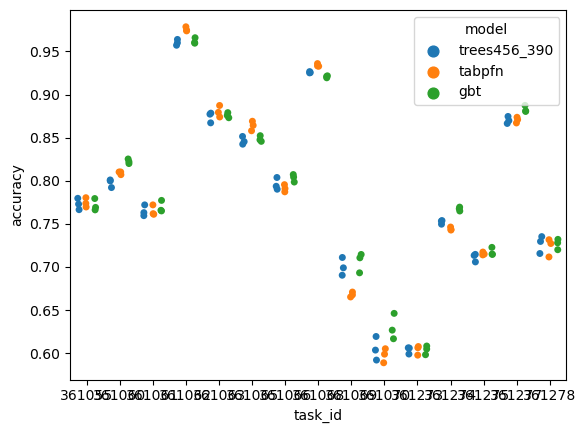

In [51]:
#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results[results["model"].isin(["tabpfn", "tabpfn_large", "gbt", "gbt_large", "checkpoint", "trees456_390_large", "trees456_390"])],
              dodge=True)

<Axes: xlabel='task_id', ylabel='accuracy'>

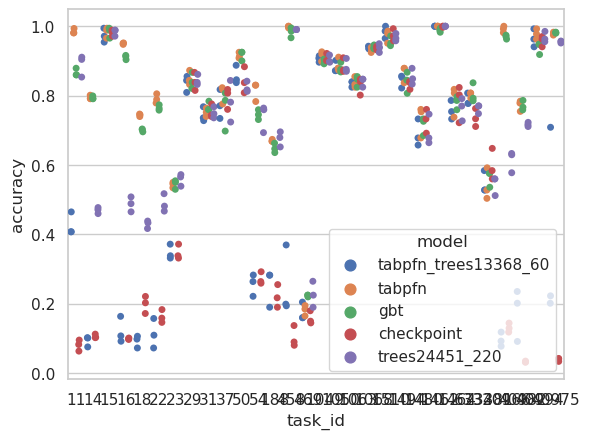

In [8]:
# plot the results
# score in y
# task_id in x
# hue is the model

sns.set(style="whitegrid")
# accuracy

#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results,#[results["model"].isin(["trees13368_60_no_prepro2", "TabPFN", "Gradient Boosting"])],
              dodge=True)

In [49]:
# Compute mean rank of each model
#results = results_337[results_337["metric"] == "accuracy"]
# group by model and task_id, and compute the mean accuracy
mean_acc = results.groupby(['model', 'task_id']).mean()


# sort the resulting dataframe by model and accuracy
sorted_acc = mean_acc.sort_values(['model', 'value'], ascending=[True, False])

# assign ranks to each model based on sorted order of accuracy
sorted_acc['rank'] = sorted_acc.groupby('task_id')['value'].rank(method='dense', ascending=False)


# compute the mean rank for each model
mean_rank = sorted_acc.groupby('model')['rank'].mean()

mean_rank

/tmp/ipykernel_29870/2435248561.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_acc = results.groupby(['model', 'task_id']).mean()


model
gbt             1.600000
tabpfn          1.933333
trees456_390    2.466667
Name: rank, dtype: float64

In [48]:
import pandas as pd

# compute the maximum and minimum accuracy for each task
task_acc_range = results.groupby('task_id')['accuracy'].agg(['max', 'min'])

# merge the maximum and minimum accuracy with the original dataframe
merged_df = pd.merge(results, task_acc_range, on='task_id')

# compute the range of accuracy for each task
merged_df['range'] = merged_df['max'] - merged_df['min']

# compute the normalized accuracy for each task
merged_df['normalized_accuracy'] = (merged_df['accuracy'] - merged_df['min']) / merged_df['range']

# compute the mean normalized accuracy for each model
mean_normalized_acc = merged_df.groupby('model')['normalized_accuracy'].mean()

print(mean_normalized_acc)


model
gbt             0.584326
tabpfn          0.461022
trees456_390    0.364889
Name: normalized_accuracy, dtype: float64
